In [8]:
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import os


import matplotlib as mpl
import scipy
import glob as glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import calendar
import xskillscore as xs
from scipy.stats import iqr
import matplotlib.patches as patches


In [12]:
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'u':'_ucur.nc', 'v':'_vcur.nc'}
models={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
            except Exception as e:
                print(e)
                pass
        #now append data to model dict
        models[model] = mod
del models["not_full"]

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_vcur.nc'


In [15]:
import pandas as pd

In [29]:
u.coords['month'] = pd.to_datetime(months)

In [31]:
u = u.rename({'month': 'time'})

In [41]:
season_order = xr.DataArray(data=['DJF', 'MAM', 'JJA', 'SON'],
    dims={'season': ['DJF', 'MAM', 'JJA', 'SON']})

In [47]:
months = [f'2000-{str(month).zfill(2)}' for month in range(1, 13)]


In [50]:
u.groupby("time.season").mean("time").reindex(season=season_order)

<xarray.DataArray 'uo' (season: 4, lat: 60, lon: 95)>
array([[[        nan,         nan, -0.27481975, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.13404723,
          0.17106527,  0.14983545],
        [        nan,         nan,         nan, ...,  0.11865189,
          0.1776972 ,  0.16151644],
        [        nan,         nan,         nan, ...,  0.01807436,
          0.07692184,  0.15097322]],

       [[        nan,         nan, -0.26805798, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.17121712,
          0.19359553,  0.16908456],
        [        nan,         nan,         nan, ...,  0.15779148,
          0.19985392,  0.18390553],
        [        nan,         nan,         nan, ...,  0.04719811,
          0.10270509,  0.17291932]],

       [[        nan,         nan, -0.24397971, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.12772443,
          0.16286633,  0.1475718 ],
        [        nan,         nan,         nan, ...,  0.09661294,
          0.15550892,  0.15783581],
        [        nan,         nan,         nan, ...,  0.01596023,
          0.06641458,  0.1441684 ]]])
Coordinates:
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
  * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
    model    int64 19

In [51]:
for i, mod in enumerate(models.keys()):
    u = models[mod]['u']
    u = u.assign_coords({"model":i})
    u = u.rename({'month': 'time'})
    u = u.assign_coords({'time':pd.to_datetime(months)})
    u = u.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        um = u
    else:
        um = xr.concat([um, u], dim = 'model')
for i, mod in enumerate(models.keys()):
    v = models[mod]['v']
    v = v.assign_coords({"model":i})
    v = v.rename({'month': 'time'})
    v = v.assign_coords({'time':pd.to_datetime(months)})
    v = v.groupby("time.season").mean("time").reindex(season=season_order)
    if i == 0:
        vm = v
    else:
        vm = xr.concat([vm, v], dim = 'model')

uMM = um.median('model')
vMM = vm.median('model')

In [83]:
spd = xr.ufuncs.sqrt(uMM**2 +vMM**2)

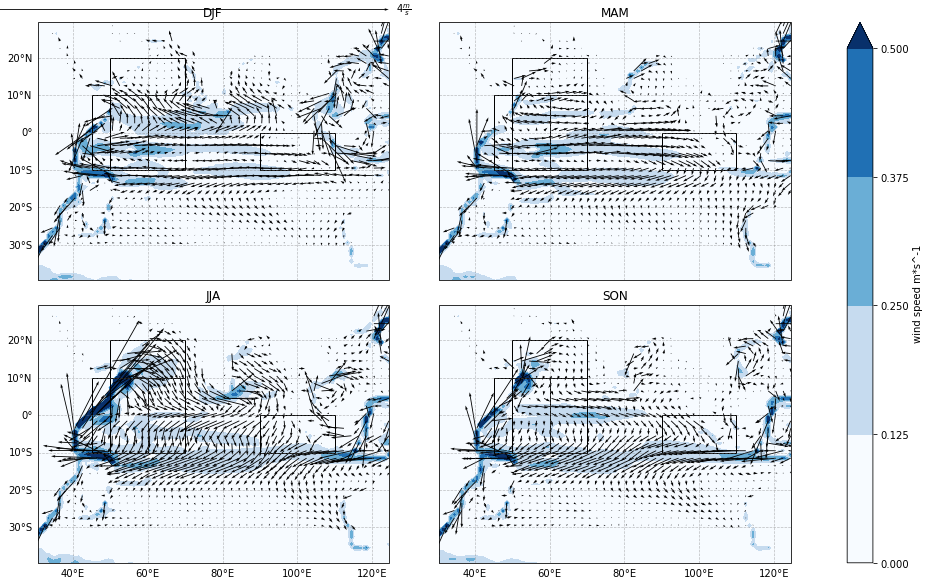

In [106]:
#E5x1 = E5x.sel(lat=slice(-30, 30), lon = slice(30, 120))
#E5y1 = E5y.sel(lat=slice(-30, 30), lon = slice(30, 120))
#spdE5 = spdE5.sel(lat=slice(-30, 30), lon = slice(30, 120))
fg = spd.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 0, vmax = 0.5, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((45,-10), 15, 20, color="k", fill = False, linewidth=1))

    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 4, r'$4 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

In [74]:
#Load SODA3 data
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'u':'_ucur.nc', 'v':'_vcur.nc'}
rean={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis

    mod={}
    for key in varis.keys():
        #input file
        inp_files = (os.path.join(datadir, model, str(model+varis[key])))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #put into dict
            mod[key]=var
        except Exception as e:
            print(e)
            pass
    #now append data to model dict
    rean[model] = mod

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ERA5/ERA5_vcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_vcur.nc'


In [75]:
rean.keys()

dict_keys(['OAFLUX', 'GODAS', 'SODA3.4.2', 'ERA5', 'ORAS5', 'ARGO'])

In [77]:
u = rean['SODA3.4.2']['u']
u = u.assign_coords({"model":i})
u = u.rename({'month': 'time'})
u = u.assign_coords({'time':pd.to_datetime(months)})
u = u.groupby("time.season").mean("time").reindex(season=season_order)

v = rean["SODA3.4.2"]['v']
v = v.assign_coords({"model":i})
v = v.rename({'month': 'time'})
v = v.assign_coords({'time':pd.to_datetime(months)})
v = v.groupby("time.season").mean("time").reindex(season=season_order)

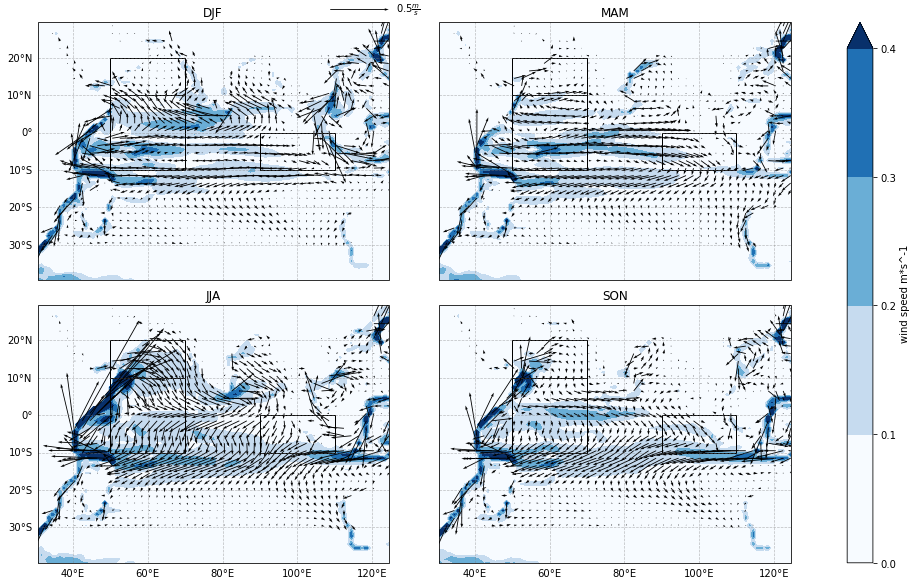

In [81]:
spd = xr.ufuncs.sqrt(u**2 +v**2)
fg = spd.plot.contourf(col='season', col_wrap = 2,  transform=ccrs.PlateCarree(),
                             subplot_kws={"projection": ccrs.PlateCarree()}, 
                              figsize=(16,8), vmin = 0, vmax = 0.4, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
for i, ax in enumerate(fg.axes.flat):
    if i ==0:
        Q = ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    else:
        ax.quiver(uMM.lon[::2], uMM.lat[::2], uMM[i, ::2,::2], vMM[i, ::2,::2], 
                  transform=ccrs.PlateCarree(), scale = 3)
    #ax.coastlines()
    ax.set_facecolor('grey')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
    if i in [0,1]:
        gl.bottom_labels = False
    if i in [1,3]:
        gl.left_labels = False
    gl.top_labels = False
    gl.right_labels = False
    #add in the boxes of interest
    #if i == 0:
    ax.add_patch(patches.Rectangle((50,-10), 20, 20, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((50,10), 20, 10, color="k", fill = False, linewidth=1))
    ax.add_patch(patches.Rectangle((90,-10), 20, 10, color="k", fill = False, linewidth=1))
#now add the month labels
titles =['DJF', 'MAM', 'JJA', 'SON']
for ax,title in zip(fg.axes.flatten(),titles):
    ax.set_title(title )
qk = ax.quiverkey(Q, 1, 1.05, 0.5, r'$0.5 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
#plt.savefig('/home/z5113258/Documents/figures/Paper_23-01-30/SF_2.eps',pad_inches = 1,  bbox_inches = 'tight')
#plt.savefig('/home/z5113258/Documents/figures/Figures_high_res/SF_N2.png', pad_inches = 1,  bbox_inches = 'tight',facecolor = 'white')

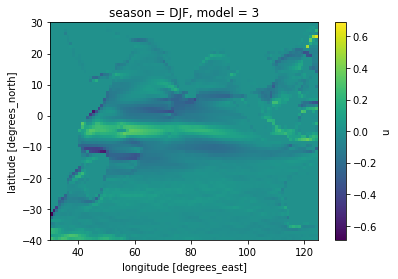

In [87]:
u[0].plot(cmap = 'viridis')

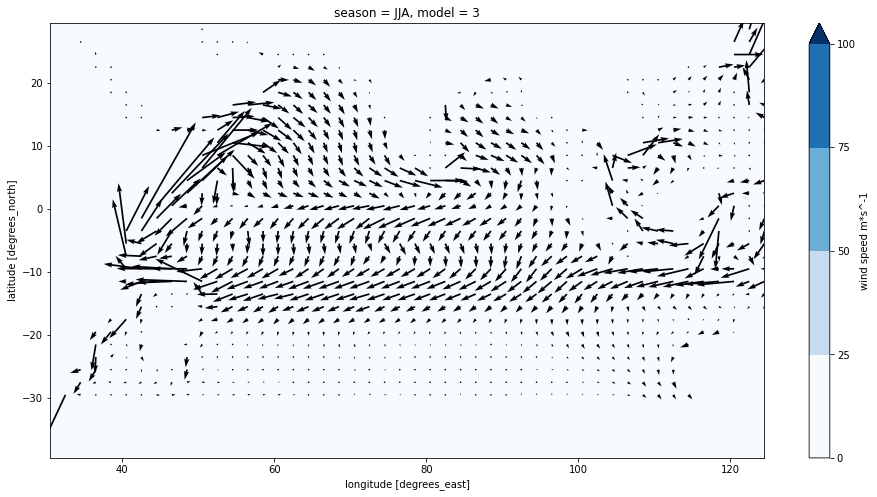

In [99]:
spd = xr.ufuncs.sqrt(u**2 +v**2)
fg = spd[2].plot.contourf(
                              figsize=(16,8), vmin = 0, vmax = 100, levels =5,  cmap = 'Blues',#can do 11 or 21 levels
                                cbar_kwargs=dict(label='wind speed m*s^-1'), extend = 'max') 
#Add in features
#for i, ax in enumerate(fg.axes.flat):
#    if i ==0:
plt.quiver(uMM.lon[::2], uMM.lat[::2], uMM[2, ::2,::2], vMM[2, ::2,::2])
#                  transform=ccrs.PlateCarree(), scale = 3)